# Advanced Fisheries Economics workshop

## Empirical bio-economic modelling


**Aim**:  Estimate the unknown parameters in the Gordon-Schaefer fisheries model using data from the fishery

What we need:

- Data (There is lots of data but data infrastrcuture and data governance is not well developed in the Pacific. Lack of data is not the problem) In recent work we have been working with over 970,000 observations so we are approaching data sets of 1 million observations in some of our work.

- A way to manipulate data (Pandas)

- A way to estimate paprameters (Statsmodels)

- A way to extract the policy from the parameter estimates or relate the policy to the parameter estimates

This is an example of structural econometrics.

## Where do we get data?


- Market and trade data: Company websites (thai Union) and government trade statistics (EU, Japan, Thailand, US)

- Data aggregators [Quandl](https://www.quandl.com/) has an API and [directly accessible using Python](https://www.quandl.com/tools/python)

- Central Banks US Federal Reserve [FRED](https://fred.stlouisfed.org/) database ([API](https://github.com/mortada/fredapi)), others by downloading

- SPC (usually sent via Slack in spreadsheet form very inefficient

- Members (usually e-mailed in a spreadsheet also very inefficient) 

- API (Application programming interface) World Bank, UN Comtrade, Quandl

- Webscraping company websites - Also a possible workshop topic

- Surveys (last reort) - This might be a topic of a futture workshop on survey sampling methods and design



## Where do we put data?


- relational database (Postgresql) in the cloud (Safe and secure)

- spreadsheets (old way of doing it): Unsafe and difficult to manage

- How do we get data from a database: **E**xtract **T**ransform **L**oad  (ETL) tool.



## Reproducibility


- Using API's enhances reproducibility (automation of data collection helps)

- Webscraping enhances reproducibility

- Reproducibility means we want to be able to reproduce graphs and results in any reports in such a way that they can be traced back to the original data. Think of it as traceability for data and report writing. 



In [186]:
!pip install psycopg2
import psycopg2 #need this to connect to the database you will need to install this from the command line with pip install psycopg2
# This is why you need administrator rights on your computer. Alternatively load the notebook to Google colaboratory and install 
#it there using !pip install psycopg2. You have limited administrator rights on Google colaboratory.
import sqlite3
import io
from sqlalchemy import create_engine
#import gspread # To link to google sheets only needed for google colaboratory
import pandas as pd
import numpy as np

### Using PANDAS

Make sure you do the tutorial 10 minutes to Pandas

[10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) (Do this as an **exercise!**)

Also it's worth reading the [Intro to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#getting-started)

We have already used Pandas a little above df is a Pandas data frame.

We can also import data from a spreadsheet directly into Pandas. This is covered in section 2 of Intro to Pandas.


A good reference for [SQL](https://www.w3schools.com/sql/)



## Connecting to a database


conn = psycopg2.connect("host=  dbname= user= password= ") establishes a connection

You need to enter the details that you will be provided with for host, dbname and password

cur = conn.cursor() 


Note this can in theory also be done using Excel Powerquery but may be blocked by your IT department.



In [187]:
conn = psycopg2.connect("host=  dbname= user= password=") 
cur = conn.cursor() 

## Queries


- Now we write a query in SQL (Structured Query Language - pronounced sequel by purists)

- We execute the query cur.execute

- We fetch the data cur.fetchall()

- we pass the data to a data frame (a list of vectors or columns)

- Finally check you have the data



In [188]:
cur.execute('SELECT * FROM ace;') # write SQL query in brackets
data = cur.fetchall()

col_names = []
for elt in cur.description:
    col_names.append(elt[0])

df = pd.DataFrame(data, columns=col_names) # Need to add headers after this call. So need to document this in Manual
df #This is a data frame you can writexl to write to Excel file

#close the connection after you ahve obtained the data
cur.close() 
conn.close()

In [189]:
df

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
0,1990-01-10,G,JP,NA,I6,0,8326,49,61,0,0,0,0,9885,252,0,1926,102.0
1,1990-01-10,G,TW,NA,I6,0,0,0,0,0,0,0,0,1859,0,0,0,NaN
2,1990-01-10,H,ID,NA,ID,0,0,5247,167,0,0,4198,134,0,272,17,0,1.0
3,1990-01-10,H,PH,NA,PH,0,0,9012,278,0,0,7210,222,0,4191,266,0,15.0
4,1990-01-10,K,PH,NA,PH,0,9444,36049,3962,0,7555,28839,3170,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,2019-01-10,T,US,AS,AS,0,6,1,0,0,0,0,0,0,0,0,0,0.0
7067,2019-01-10,T,US,GU,GU,0,218,38,0,0,0,0,0,0,25,0,0,0.0
7068,2019-01-10,T,US,HW,HW,0,104,404,35,0,0,0,0,1,151,2,13,0.0
7069,2019-01-10,T,US,MP,MP,0,157,17,0,0,0,0,0,0,2,0,0,0.0


## Data cleaning with Pandas


- Extract the data you need to fit catch to effort (days)

- do this by selecting the two columns you need from the data frame df




In [190]:
soldata = df[df['ez_id']=='SB']
soldata.head()

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
30,1990-01-10,L,JP,CS,SB,0,0,0,0,0,0,0,0,0,0,0,0,NaN
52,1990-01-10,L,JP,DW,SB,1512,0,3014,655,0,0,0,0,65,29,5,1,NaN
70,1990-01-10,L,KR,NA,SB,185,2,124,26,0,0,0,0,211,2,1,2,NaN
91,1990-01-10,L,TW,DW,SB,78,0,7,2,0,0,0,0,82,0,1,0,NaN
105,1990-01-10,L,TW,OS,SB,35,0,1,7,0,0,0,1,0,0,2,0,NaN


In [191]:
soldata2 = pd.DataFrame(soldata)
soldata2['yr'] = pd.to_datetime(soldata2['yr'])
soldata2[soldata2['yr'] > '2010-01-10']
soldata2 = soldata2[soldata2['gr_id'] =='L']

days = soldata2['days']
catch = soldata2['alb_c']
print(catch,days)

30        0
52       65
70      211
91       82
105       0
       ... 
6695    224
6860    221
6889     15
6935      3
6945     37
Name: alb_c, Length: 139, dtype: int64 30         0
52      1512
70       185
91        78
105       35
        ... 
6695     428
6860     479
6889     139
6935     162
6945      81
Name: days, Length: 139, dtype: int64


In [192]:
soldata2

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
30,1990-01-10,L,JP,CS,SB,0,0,0,0,0,0,0,0,0,0,0,0,NaN
52,1990-01-10,L,JP,DW,SB,1512,0,3014,655,0,0,0,0,65,29,5,1,NaN
70,1990-01-10,L,KR,NA,SB,185,2,124,26,0,0,0,0,211,2,1,2,NaN
91,1990-01-10,L,TW,DW,SB,78,0,7,2,0,0,0,0,82,0,1,0,NaN
105,1990-01-10,L,TW,OS,SB,35,0,1,7,0,0,0,1,0,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,2018-01-10,L,VU,NA,SB,428,6,181,31,0,0,0,0,224,9,0,0,1.0
6860,2019-01-10,L,FJ,NA,SB,479,10,191,53,0,0,0,0,221,20,0,0,1.0
6889,2019-01-10,L,KR,NA,SB,139,3,33,48,0,0,0,0,15,14,0,0,1.0
6935,2019-01-10,L,TW,OS,SB,162,0,61,7,0,0,0,0,3,3,3,0,0.0


## Plotting


First plot your data. Use a scatter plot for this. Catch on the vertical axis and effort on the horizontal.

*italicized text*

In [193]:
import matplotlib.pyplot as plt

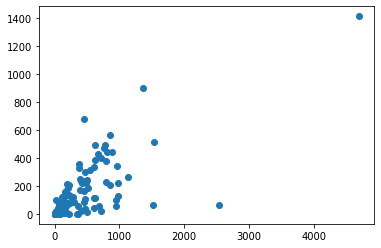

In [194]:
plt.scatter(days,catch)

## Econometrics

We will use the equations from the previous notebook afew-present-5.ipynb

- we wish to estimate the relationship between catch and effort the sustainable yield curve from the alst notebook

- For the Gordon-Schaefer model that is a quadratic relationship

$$ y_i = \beta_0 +\beta_{i} X_{i1} + \beta_2 X_{i}^2 + \epsilon_i, i=1,\dots,n$$

The theory tells us that $\beta_0 = 0$.

where $X_{i}$ is total fishing effort.

Now we ccould just estimate this relationship from the data. However, the theory tells us that $E_{MEY}$ depdns on the model parameters 



## Estimate the model


The model can be estimated using ordinary least squares (linear regression/line of best fit).



In [195]:


y = catch
y = y.values

x = soldata2['days']

X = np.column_stack((x, x**2))

X 


array([[       0,        0],
       [    1512,  2286144],
       [     185,    34225],
       [      78,     6084],
       [      35,     1225],
       [       0,        0],
       [    2539,  6446521],
       [      24,      576],
       [      95,     9025],
       [      77,     5929],
       [       0,        0],
       [    1129,  1274641],
       [      31,      961],
       [       0,        0],
       [    1541,  2374681],
       [     121,    14641],
       [    1359,  1846881],
       [     209,    43681],
       [    4701, 22099401],
       [     149,    22201],
       [     719,   516961],
       [     122,    14884],
       [      68,     4624],
       [       3,        9],
       [     956,   913936],
       [       1,        1],
       [     216,    46656],
       [     390,   152100],
       [     437,   190969],
       [      17,      289],
       [     158,    24964],
       [       1,        1],
       [     116,    13456],
       [     449,   201601],
       [      

In [196]:
import statsmodels.api as sm #Import statsmodels for econometrics

# need to define y and X you should already have extracted the data and plotted it
# so you just need to pass catch to y and days and day squared to X


model = sm.OLS(y,X)
results = model.fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              25.75
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                    3.22e-10
Time:                        20:13:27   Log-Likelihood:                         -874.13
No. Observations:                 139   AIC:                                      1752.
Df Residuals:                     137   BIC:                                      1758.
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

## Standard errors


- Econometric practice has changed over time 

- "Credibility revolution"

- Use of asymptotic rather than small sample standard errors

- [Newey-West robust standard errors](https://en.wikipedia.org/wiki/Newey%E2%80%93West_estimator) 

- use of robustness tests

- Reduced form is associated with the credibility revolution

- Here we are doing a very simple structural model

## Extract the parameters


In [197]:
params = pd.DataFrame(results.params)
hh = params[:1]
hsq = params[1:]
b0 = hh[0][0]
b1 = - hsq[0][1] # revers the sign here because we have estimated boE - b1 E^2 whereas statsmodels estimated b0 E + b1 E^2
print(b0,b1)

0.342839783583941 1.763902045536504e-05


## Calculating MEY from the estimated relationship
To determine maximum economic yield we solve the following problem

$$\max \Pi (E) = p h(E)- cE $$
subject to

$$\frac{dX}{dt} = rX(1-\frac{X}{K})- h(E)= 0$$
and $Y(E) = qXE$.

In stready state (if you are fishing sustainably) the constraint can be rearranged to obtain

$$X = K (1 - \frac{q}{r} E) $$
Substituting into the total rent results in

$$ \Pi (E) = p q K (1 - \frac{q}{r} E) E - c E = p q K E - \frac{p q^2 K}{r} E^2  - c E $$
Maximizing and solving for E results in

$$ E = \frac{r(pqK - c)}{2 pq^2 K} $$
which is exactly half of open access effort level. To determine this level we need the price $p$.

Note that sustainable harvest is given by

$$ q K (1 - \frac{q}{r} E) E  =  q K E - \frac{q^2 K}{r } E^2$$

Setting $ q K = b_0 $ and $ \frac{q^2 K}{r} = b_1$. Wecan then fit a quadratic regression but this implies a constraint on the parameters that depends on the parameter values and so would have to be estimated with Bayesian methods. Alternatively, we can use non-linear least-squares to fit the model.

We can rewrite $E_{MEY}$ as

$$ \frac{r(p b_0  - c)}{2 p r b_1} = \frac{p b_0 - c}{2 p b_1}$$

 
How much will be caught at this level of fishing?

$$Y = q E X$$

where $X = K (1 - \frac{q}{r} E)$

So

$$Y_{TAC} = q E K (1 - \frac{q}{r} E) = qK E - \frac{q^2 K}{r} E^2 = b_0 E -b_1 E^2$$$$ =  b_0 \frac{p b_0 - c}{2 p b_1} -b_1 (\frac{p b_0 - c}{2 p b_1})^2 $$$$ = \frac{p b_0^2 - c b_0}{2 p b_1} - \frac{(p b_0 - c)^2}{4 p^2 b_1}$$

We can now compute this and compare with the historical TAC.



## How to calculate costs


- Costs often tobtained from vessel surveys but this requires careful planning to avoid collecting biased data

- Alternatively costs can be calculated from catch, the price of fuel/oil and fuel utilization per mt of catch and information on what proportion of the total costs are due to fuel use

- This can be validated against other data in the region.



## Surveys


- First identify a sampling frame (A list of all member sof the population, i.e. **a list of all vessels**)

- Radomly select a sample from this population

- How many to sample?

We are interested in the mean cost of fishing per day. We will assume the cost of fishing is normally distributed for purposes of illustration and that we are examining a single gear type.





Then if $\bar{x}$ is the mean cost of fishing the standard error of the cost of fishing is given by $\frac{\sigma}{\sqrt{n}}$

The sampling bias is given by $\mu - \bar{x}$

The confidence interval for $\mu$ is

$$\bar{x} - Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{x} + Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} $$

If we set an error tolerance for the sampling error so that

$$ \mu -\bar{x} \leq \epsilon$$

Then $$Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} \leq \epsilon$$

From this we obtain that $n > Z_{\frac{\alpha}{2}}^2\frac{\sigma^2}{\epsilon^2}$.

Usually we set $\alpha = 0.05$ for a 9
%% confidence interval, $\sigma$ we otain from previous studies, e.g. past surevys. $\epsilon$ we choose what error we are prepared to accespt and $Z$ we obtain from the normal distribution tables or from the computer.



$$ \mbox{Total cost of fishing} = $$ 

$$\mbox{oil price} \times \mbox{conversion factor to marine diesel equivalents} \times (\mbox{fuel use intensity (L/mt)})/0.2  \times \mbox{catch (mt)}$$

- fuel use intensity is avaible from published literature

- conversion factors from petroleum engineering tables

- oil price from Quandl

- catch from the database

In [200]:
p = 3000 # price 
c = 1000 # costs per day 

EMEY = (p*b0 - c)/2*p*b1
print('MEY:',EMEY)
EMSY = b0/(2*b1)

yTAC = ((p*(b0**2) - c*b0)/(2*p*b1)) - ((p*b0 - c)**2)/(4*(p**2)*b1)

Ymsy = 0.25*(b0**2)/b1
rent = p*(b0*EMEY - b1*EMEY**2) - c*EMEY
#M = (r*(p*q*K+c)**2)/(4*K*(p*q)**2) need to express n terms of b0 and b1 can use this to compare to SAM18 M=0.4
print('MSY:',EMSY)
print('Difference:',EMSY-EMEY)
print('TAC',yTAC)
print('TAC at MSY',Ymsy) 
print('Rent',rent)
#print('Natural mortality at MEY',M
bb1 = yTAC

MEY: 0.7545801169277081
MSY: 9718.220590862338
Difference: 9717.466010745411
TAC 91.10491868069245
TAC at MSY 1665.8963220961216
Rent 21.490004518435512


## Sensitivity analysis (Uncertainty quantification)

To conduct the [sensitivity analysis](https://en.wikipedia.org/wiki/Sensitivity_analysis) we will use the Sobol sensitivity analysis method, this differs somewhat from a ceteris-paribus approach to sensitivity analysis which is a local method. Sobol or [variance-based sensitivity analysis](https://en.wikipedia.org/wiki/Variance-based_sensitivity_analysis) is a global method, So that it allows us to systematically examine variations in multiple parameters, e.g. price and cost but also the biologial parameters within given confidence bounds.

In [201]:
!pip install SALib
from SALib.sample import saltelli
from SALib.analyze import sobol 
#from SALib.test_functions import Ishigami

     |████████████████████████████████| 860kB 4.1MB/s 
  Created wheel for SALib: filename=SALib-1.3.12-py2.py3-none-any.whl size=729049 sha256=6cc5db6892055e60601258f5e88d45daf190b7992b0011e087abcbb7dd1fca0c
  Stored in directory: /root/.cache/pip/wheels/04/5c/9f/09d58ab84d5a7ef7d2e5fedc5cd2f46a64a77c99035571aa0c
Successfully built SALib


In [202]:
def gordonschaefer(par):
    hh = params[:1]
    hsq = params[1:]
    b0 = hh[0][0]
    b1 = - hsq[0][1]
    #p = (155455707/46620575)*1000 # Albacore price per tonne 2018 Thailand average import price
    #p = X[0]
    
    p = param_values[i][0]
    E = np.linspace(0,500000,10000)
    y_pred = b0*E - (E**2)*b1
    rev = p*y
    rev_pred = p*y_pred
    c = 1.01 # cost per unit effort 
    
    #c = x[1]
    #c = param_values[i][1]
    
    cost = c*E
    EMEY = (p * b0 - c)/(2*p*b1)
    EMSY = b0/(2*b1)
    yTAC = ((p*(b0**2) - c*b0)/(2*p*b1)) - ((p*b0 - c)**2)/(4*(p**2)*b1)
    Ymsy = 0.25*(b0**2)/b1
    rent = p*(b0*EMEY - b1*EMEY**2) - c*EMEY
    
    #avghooksperday = df.loc[df['yy']==2017]['hooks per day'].mean() # actual hooks per day.
    #vesseldays = EMEY/avghooksperday
    #actualdays = df.loc[df['yy']==2017]['days'].sum()
    #averagedays = actualdays/n2017
    #novessels = vesseldays/averagedays # one could also calculate this by 
    # flag rather than a broad average, this would probably smooth negotiations
    return(EMEY)

    # need to take a statsmodels object as an instance and transorm parameter estimates within this function
    # Model output might be choosable, examples include vessel numbers, hooks, rent, etc.
    


# Define the problem
problem = {
    'num_vars': 2,
    'names': ['p', 'c'],
    'bounds': [[2000, 5000],
               [0.0, 200.0]]
}

param_values = saltelli.sample(problem, N = 1000)

Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    #print(i,X)
    Y[i] = gordonschaefer(X)
    

#print(Y)

In [203]:
si = sobol.analyze(problem, Y, calc_second_order = False,print_to_console=True) #this is producing an error
print(si)

Parameter S1 S1_conf ST ST_conf
p -0.332708 0.053314 0.334521 0.045020
c 0.485675 0.062175 0.669502 0.062404
{'S1': array([-0.33270801,  0.48567453]), 'S1_conf': array([0.05331415, 0.06217512]), 'ST': array([0.33452097, 0.66950245]), 'ST_conf': array([0.04501979, 0.06240395])}


Text(0, 0.5, 'Frequency')

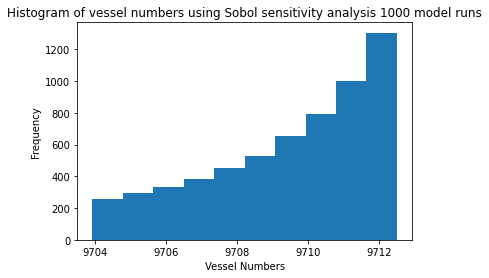

In [204]:
plt.hist(Y)
plt.title('Histogram of vessel numbers using Sobol sensitivity analysis 1000 model runs')
plt.xlabel('Vessel Numbers')
plt.ylabel('Frequency')

In [ ]:
res = pd.DataFrame(si)
res.rename(index={0:'price',1:'cost per unit effort'},inplace=True)
res

S1 is the ratio of the variance of vessel days conditional on a particular parameter value to the variance of vessel days. It is the first-order Sobol sensitivity index. The results indicate that cost per hook has a far greater impact on the sensitivity of the number of vessels than does the price.